Распределяем файлы для подготовки данных

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_edit.csv')
valid_df = pd.read_csv('valid_edit.csv')
# train_df = pd.read_csv("../AC/trein.csv")
# valid_df = pd.read_csv("../AC/val.csv")

Подготовка данных для распределения данных

In [56]:
X_train = train_df.drop(columns=['target'], errors='ignore')
X_val = valid_df.drop(columns=['target'], errors='ignore')

#целевая переменная для валидации (1- нормальные, -1 - аномальные)
y_val = valid_df['target'] if 'target' in valid_df.columns else None

Обучение модели One-Class SVM

In [ ]:
model = OneClassSVM(kernel="rbf", gamma='auto', nu=0.2)

model.fit(X_train)

OneClassSVM(gamma='auto', nu=0.9)

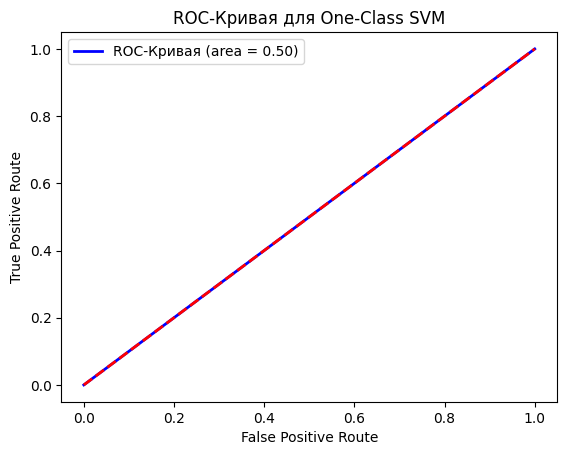

In [58]:
y_scores = model.decision_function(X_val)

if y_val is not None:
    fpr, tpr, thrasers = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color= 'blue', lw=2, label=f'ROC-Кривая (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0,1], color ='red', lw=2, linestyle='--')
    plt.xlabel('False Positive Route')
    plt.ylabel('True Positive Route')
    plt.title('ROC-Кривая для One-Class SVM')
    plt.legend(loc='upper left')
    plt.show()
else:
    print('Целевые метки (y_val) отсутствуют. ROC-Кривую невозможно построить')